In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchsummary


from trainer import Trainer 
from tester import Tester
from utils import  visualize_data,show_misclassified_images,plot_class_distribution,plot_confusion_matrix,plot_curves
from dataloader import Cifar10DataLoader
from vistransformers import train_transforms,test_transforms
from model import Net,Network

In [3]:
torch.cuda.amp.autocast(enabled=True,dtype=torch.float16)
torch.set_float32_matmul_precision('medium')

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Is CUDA available? ", use_cuda)

Is CUDA available?  True


In [5]:
cifar10 = Cifar10DataLoader(is_cuda_available=use_cuda)

train_loader = cifar10.get_loader(transforms=train_transforms,train=True)
test_loader  = cifar10.get_loader(transforms=test_transforms,train=False) 

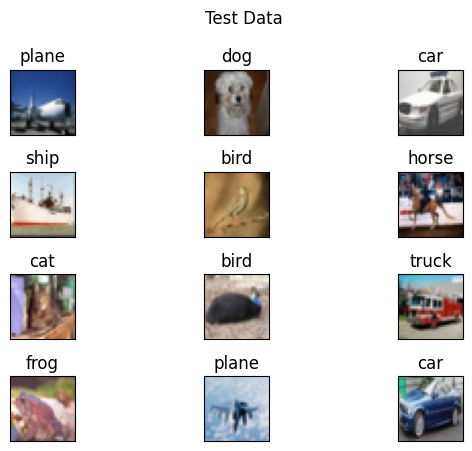

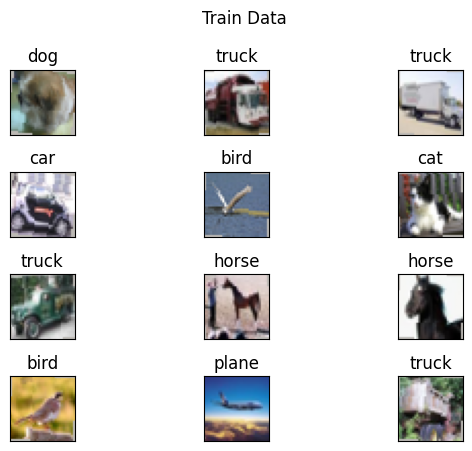

In [6]:
visualize_data(test_loader,12,"Test Data",classes=cifar10.classes)
visualize_data(train_loader,12,"Train Data",classes=cifar10.classes)

In [7]:
model = Network('group')
torchsummary.summary(model=model.cuda(),input_size=(3,32,32),batch_size=-1,device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
         Dropout2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
         Dropout2d-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]              32
        Dropout2d-14           [-1, 16,

EPOCH=1| LR=0.200000| LOSS=1.85| BATCH=390| ACCURACY=30.090: 100%|██████████| 391/391 [00:24<00:00, 16.27it/s]
LOSS=130.86| BATCH=78| ACCURACY=40.230: 100%|██████████| 79/79 [00:07<00:00, 10.64it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=2| LR=0.200000| LOSS=1.49| BATCH=390| ACCURACY=41.242: 100%|██████████| 391/391 [00:21<00:00, 17.83it/s]
LOSS=128.43| BATCH=78| ACCURACY=40.400: 100%|██████████| 79/79 [00:07<00:00, 10.88it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=3| LR=0.200000| LOSS=1.34| BATCH=390| ACCURACY=47.914: 100%|██████████| 391/391 [00:22<00:00, 17.02it/s]
LOSS=102.18| BATCH=78| ACCURACY=53.050: 100%|██████████| 79/79 [00:08<00:00,  9.54it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=4| LR=0.200000| LOSS=1.28| BATCH=390| ACCURACY=52.654: 100%|██████████| 391/391 [00:23<00:00, 16.85it/s]
LOSS=93.92| BATCH=78| ACCURACY=56.800: 100%|██████████| 79/79 [00:07<00:00, 10.07it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=5| LR=0.200000| LOSS=1.18| BATCH=390| ACCURACY=56.828: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]
LOSS=88.26| BATCH=78| ACCURACY=58.950: 100%|██████████| 79/79 [00:07<00:00, 10.06it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=6| LR=0.200000| LOSS=1.19| BATCH=390| ACCURACY=58.966: 100%|██████████| 391/391 [00:22<00:00, 17.33it/s]
LOSS=85.36| BATCH=78| ACCURACY=61.480: 100%|██████████| 79/79 [00:07<00:00, 10.21it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=7| LR=0.200000| LOSS=0.93| BATCH=390| ACCURACY=61.220: 100%|██████████| 391/391 [00:22<00:00, 17.38it/s]
LOSS=81.48| BATCH=78| ACCURACY=62.960: 100%|██████████| 79/79 [00:07<00:00, 10.19it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=8| LR=0.200000| LOSS=1.02| BATCH=390| ACCURACY=63.062: 100%|██████████| 391/391 [00:22<00:00, 17.29it/s]
LOSS=75.49| BATCH=78| ACCURACY=66.420: 100%|██████████| 79/79 [00:07<00:00, 10.23it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=9| LR=0.200000| LOSS=1.10| BATCH=390| ACCURACY=64.816: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]
LOSS=75.14| BATCH=78| ACCURACY=66.830: 100%|██████████| 79/79 [00:07<00:00, 10.25it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=10| LR=0.200000| LOSS=1.14| BATCH=390| ACCURACY=66.080: 100%|██████████| 391/391 [00:22<00:00, 17.29it/s]
LOSS=69.39| BATCH=78| ACCURACY=69.110: 100%|██████████| 79/79 [00:07<00:00, 10.20it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=11| LR=0.200000| LOSS=0.90| BATCH=390| ACCURACY=67.546: 100%|██████████| 391/391 [00:22<00:00, 17.17it/s]
LOSS=66.12| BATCH=78| ACCURACY=70.590: 100%|██████████| 79/79 [00:07<00:00, 10.06it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=12| LR=0.200000| LOSS=0.84| BATCH=390| ACCURACY=68.490: 100%|██████████| 391/391 [00:22<00:00, 17.00it/s]
LOSS=64.04| BATCH=78| ACCURACY=71.080: 100%|██████████| 79/79 [00:07<00:00, 10.10it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=13| LR=0.200000| LOSS=0.71| BATCH=390| ACCURACY=69.642: 100%|██████████| 391/391 [00:22<00:00, 17.50it/s]
LOSS=65.33| BATCH=78| ACCURACY=70.590: 100%|██████████| 79/79 [00:07<00:00, 10.14it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=14| LR=0.200000| LOSS=0.95| BATCH=390| ACCURACY=70.298: 100%|██████████| 391/391 [00:22<00:00, 17.46it/s]
LOSS=63.60| BATCH=78| ACCURACY=71.840: 100%|██████████| 79/79 [00:07<00:00, 10.37it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=15| LR=0.200000| LOSS=0.82| BATCH=390| ACCURACY=71.094: 100%|██████████| 391/391 [00:22<00:00, 17.61it/s]
LOSS=61.18| BATCH=78| ACCURACY=72.690: 100%|██████████| 79/79 [00:07<00:00, 10.17it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=16| LR=0.200000| LOSS=0.84| BATCH=390| ACCURACY=71.880: 100%|██████████| 391/391 [00:26<00:00, 14.98it/s]
LOSS=61.69| BATCH=78| ACCURACY=72.010: 100%|██████████| 79/79 [00:08<00:00,  9.71it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=17| LR=0.200000| LOSS=1.02| BATCH=390| ACCURACY=72.116: 100%|██████████| 391/391 [00:25<00:00, 15.04it/s]
LOSS=58.99| BATCH=78| ACCURACY=74.280: 100%|██████████| 79/79 [00:07<00:00, 10.14it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=18| LR=0.200000| LOSS=0.85| BATCH=390| ACCURACY=72.776: 100%|██████████| 391/391 [00:23<00:00, 16.76it/s]
LOSS=61.34| BATCH=78| ACCURACY=72.710: 100%|██████████| 79/79 [00:07<00:00, 10.24it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=19| LR=0.200000| LOSS=0.74| BATCH=390| ACCURACY=73.566: 100%|██████████| 391/391 [00:23<00:00, 16.93it/s]
LOSS=57.07| BATCH=78| ACCURACY=74.380: 100%|██████████| 79/79 [00:08<00:00,  9.84it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=20| LR=0.200000| LOSS=0.79| BATCH=390| ACCURACY=73.792: 100%|██████████| 391/391 [00:22<00:00, 17.02it/s]
LOSS=57.55| BATCH=78| ACCURACY=74.590: 100%|██████████| 79/79 [00:08<00:00,  9.69it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


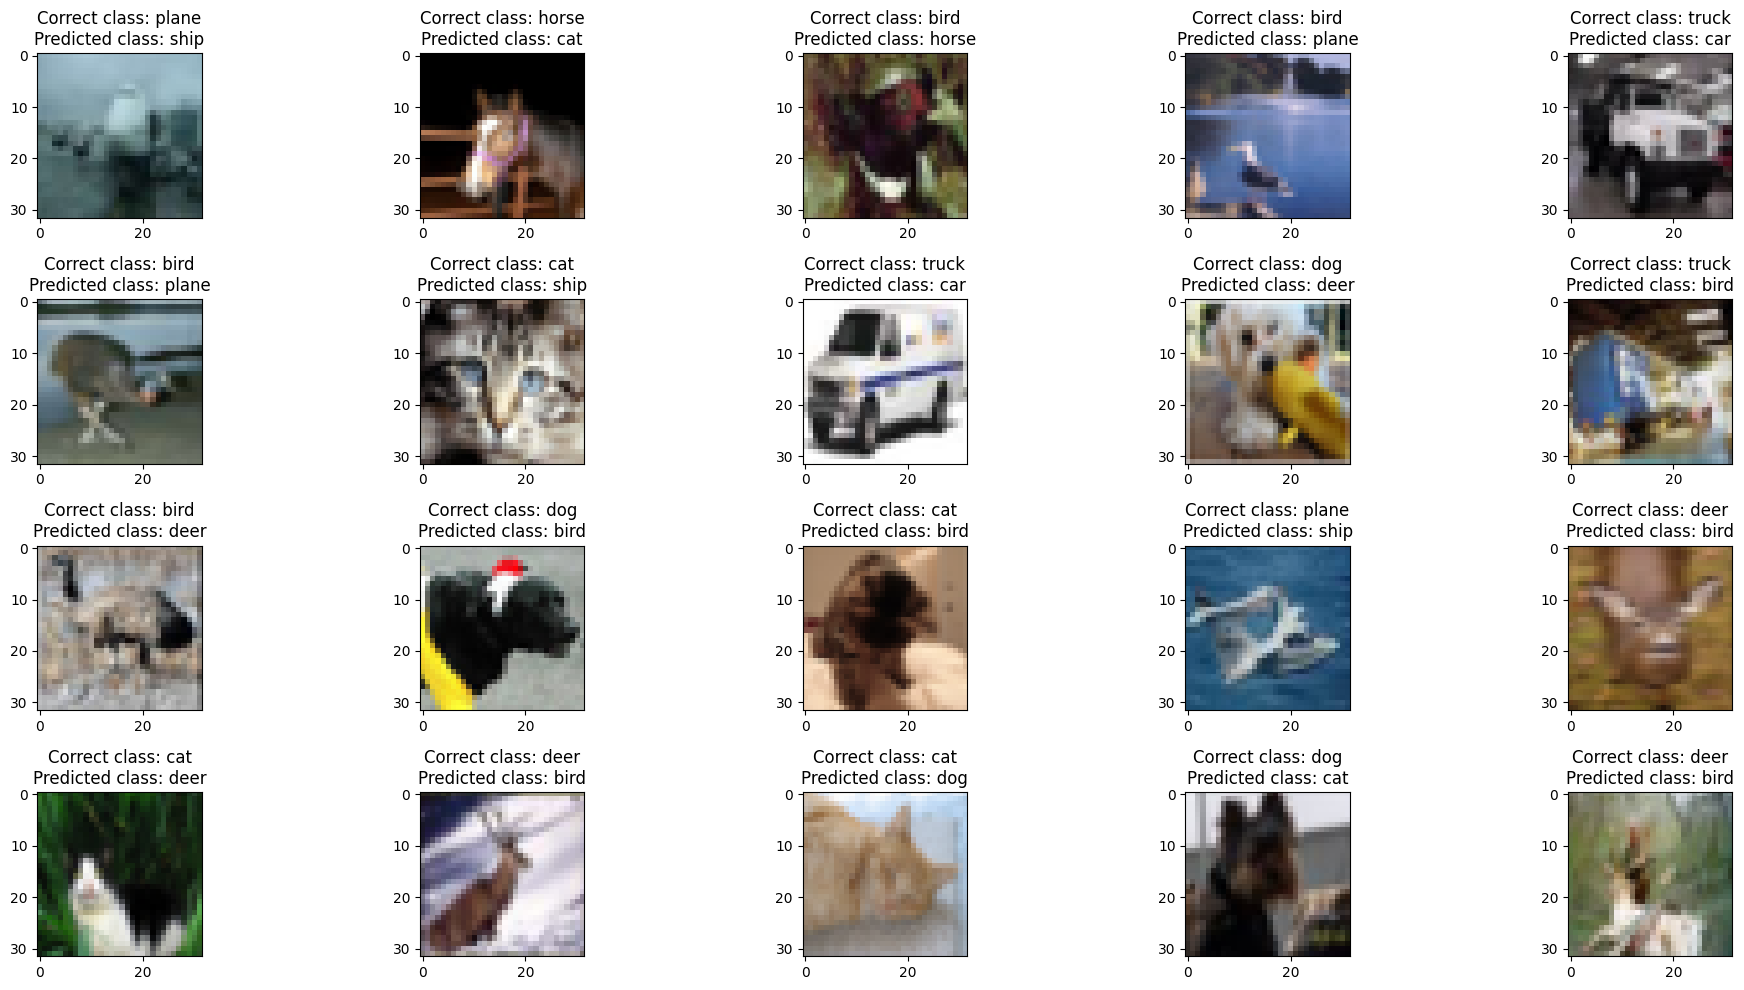

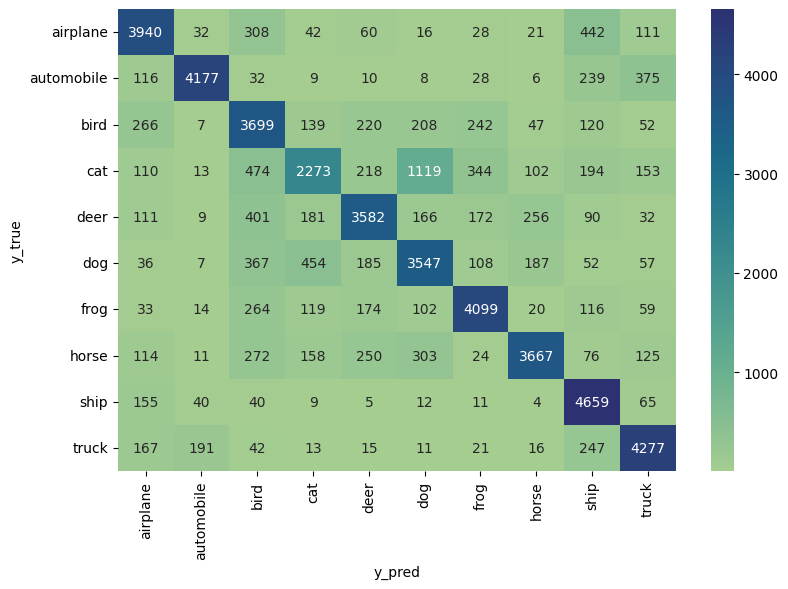

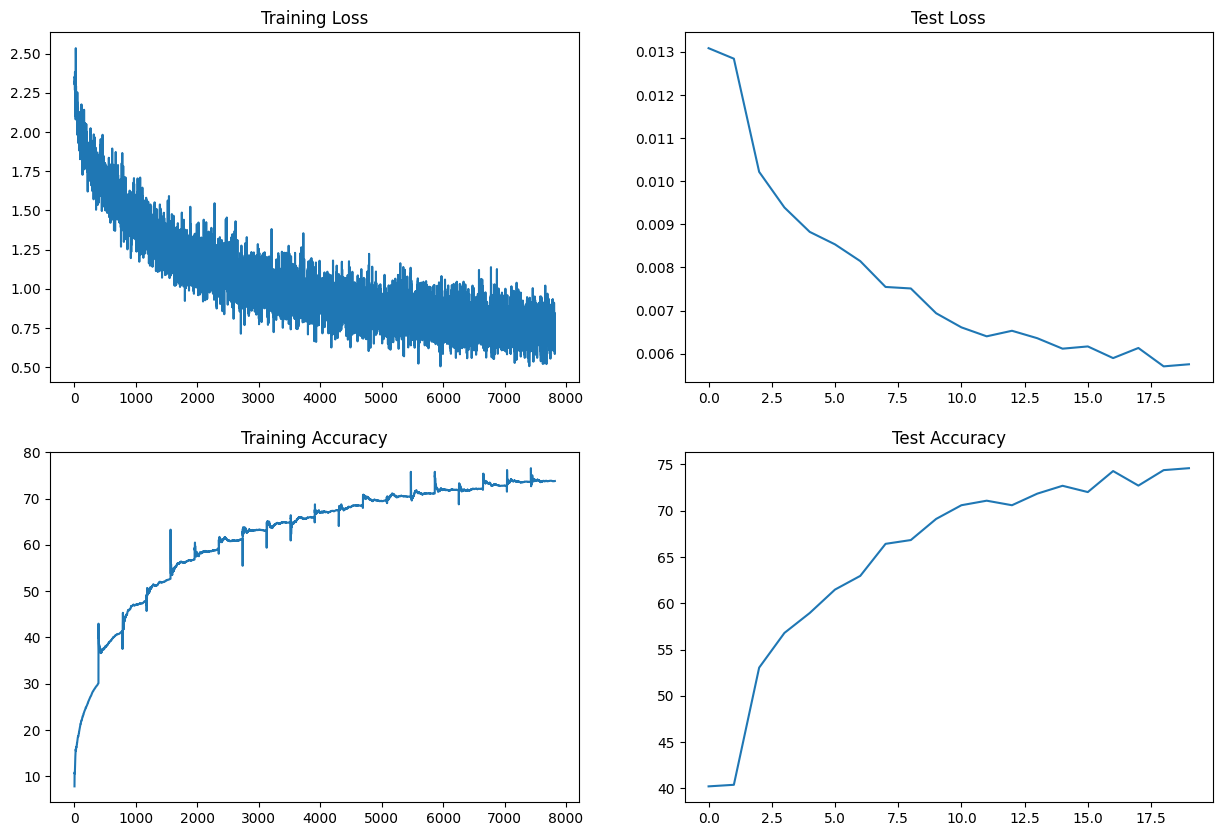

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,mode='min',factor=0.1,patience=5)
criterion = nn.NLLLoss()


trainer = Trainer(model, train_loader, optimizer, criterion, device)
tester = Tester(model, test_loader, criterion, device)

for epoch in range(1, 21):
    trainer.train(epoch=epoch)
    _,test_loss = tester.test()
    scheduler.step(test_loss)
    print('-'*200)


misclassified_images, predictions, labels = tester.get_misclassified_images()

show_misclassified_images(
    misclassified_images[:20],
    predictions[:20],
    labels[:20],
    cifar10.classes,
);

plot_confusion_matrix(model,train_loader,'cuda',train_loader.dataset.classes);

plot_curves(trainer.train_losses,trainer.train_accuracies,tester.test_losses,tester.test_accuracies);

In [9]:
torch.save(model.state_dict(),'./assets/GN/modelBN.pth')

In [10]:
torch.save(optimizer.state_dict(),'./assets/GN/optimBN.pth')